# Trabalho Prático 4
**Grupo 22**

Alexis Correia - A102495 <br>
João Fonseca - A102512 <br>

## Problema 1

### Enunciado

No contexto do sistema de travagem ABS (“Anti-Lock Breaking System”), pretende-se construir um autómato híbrido que descreva o sistema e que  possa ser usado para verificar as suas propriedades dinâmicas.

A componente discreta do autómato contém os modos:  `Start`,  `Free`,  `Stopping`, `Blocked`, e `Stopped`. No modo `Free`  não existe qualquer força de travagem; no modo `Stopping` aplica-se a força de travagem alta; no modo `Blocked` as rodas estão bloqueadas em relação ao corpo mas o veículo  desloca-se; no modo `Stopped` o veículo está imobilizado.

A componente contínua  do autómato usa variáveis contínuas $\,V,v\,$ para descrever a  `velocidade do corpo`  do veículo em relação ao solo e a `velocidade linear das rodas` também em relação ao solo.  Assume-se que o sistema de travagem exerce uma força de atrito  nos travões proporcional à diferença das duas velocidades.  A dinâmica contínua está descrita  abaixo no bloco Equaçoes de Fluxo.

1. Defina um autómato híbrido que descreva a dinâmica do sistema segundo as notas abaixo indicadas e com os “switchs” por si escolhidos. 
    Os “switchs” (“jumps”) são uma  componente de projeto deste trabalho; cabe ao aluno definir quais devem ser estas  condições de modo a que o sistema tenha um comportamento desejável: imobilize-se depressa e não “derrape” muito.
2. Modele em lógica temporal linear LT  propriedades que caracterizam o comportamento desejável do sistema. Nomeadamente 
    1. ”o veículo imobiliza-se completamente em menos de $t$ segundos” 
    2. “a velocidade $V$ diminui sempre com o tempo”.
3. Construa o FOTS que que descreve a discretização do  modelo  que definiu em a. e codifique em SMT’s
4. Codifique a verificação das propriedades temporais que definiu em *2*.

![alt text](image.png)

Equações de Fluxo 

1. Durante  a travagem não existe qualquer  força no sistema excepto as forças de atrito. Quando uma superfície se desloca em relação à outra, a força de atrito  é proporcional à força de compressão entre elas. 
2. No contacto rodas/solo o atrito é constante porque a força de compressão é o peso; tem-se $f = a\cdot P$ sendo  $a$ a constante de atrito e $P$ o peso. Ambos são fixos e independentes do modo.
3. No contacto corpo/rodas,  a força de compressão é a força de travagem que aqui se assume como proporcional à diferença de velocidades  $F =  c\cdot (V-v)$.  A  constante de proporcionalidade $c$ depende do modo: é elevada no modo `Stopping` e baixa nos outros.
4. Existe um atrito no contacto corpo/ar  que é aproximado por uma constante positiva $\,b$.


5. As equações que traduzem a dinâmica  do sistema são, em todos os modo excepto `Blocked`,
$$\begin{array}{rcl} \dot{V} & = & - c\cdot(V-v) - b\\ \dot{v} & = & -a\cdot P  + c\cdot(V-v) \end{array}$$   

e , no modo `Blocked`,  a dinâmica do sistema é  regida por
$$(V = v) \;\land\; (\,\dot{V}\,=\, -a\cdot P - b\,)$$


6. Tanto no modo `Blocked`  como no modo `Free`  existe um “timer” que impede que se permaneça nesses modo mais do que $\,\tau\,$ segundos. Os $\mathsf{jumps}(V,v,t,V',v',t')\,$ com origem nesses modos devem forçar esta condição.
7. No instante inicial assume-se $\,V = v\,=\,V_0$  ,  em que a velocidade $V_0$ é o “input” do problema.

### Resolução

#### Parte 1

Começamos por definir o autómato híbrido que modela o comportamento do sistema de travagem ABS acima descrito.

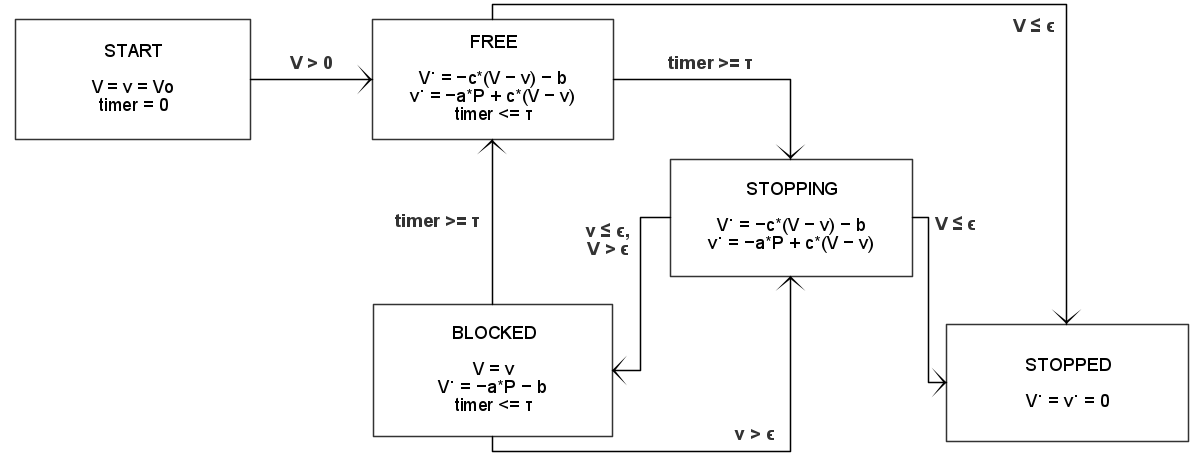

O sistema começa com uma velocidade $V_0$ maior do que 0. [...]

#### Parte 2

Em seguida, podemos passar para a etapa de modelação em lógica temporal linear (LT). As  propriedades que desejamos modelar são aquelas que caracterizam o comportamento desejável do sistema. Nomeadamente :
1. ”o veículo imobiliza-se completamente em menos de $t$ segundos” 
2. “a velocidade $V$ diminui sempre com o tempo”.

>A primeira pode ser traduzida como: $ F(V=0) $; isso quer dizer que, eventualmente (após $t$ segundos com $t\in\R$) o veículo irá parar ($V=0$).

>A segunda, por outro lado, é da seguinte forma: $ G(V'\leq V) $; em outras palavras, a velocidade $V$ será decrescente em todos os momentos.

#### Parte 3

O primeiro passo na construção deste FOTS é determinar as variáveis que serão utilizadas. Neste caso, além das variáveis $V$ e $v$ (as Forças $F$ e $f$ são constantes, dependendo apenas dos valores de $a$, $b$ e $c$) precisaremos das variáveis contínua $t$, que será o *timer*, e a variável discreta $m$ que denota o modo.

Em seguida, escrevemos as condições do estado inicial. De acordo com o enunciado e o Autómato Híbrido feito anteriormente, o estado inicial será:
$$ t=0 \wedge m=\text{START} \wedge V=V_0 \wedge v=V_0$$

Por fim, precisamos identificar as transições deste sistema, tantos as ```timed``` quanto as ```untimed```. As transições **untimed** são:
$$
m = \text{START} \wedge V=v \wedge V>0 \wedge m' = \text{FREE} \wedge V' = V \wedge v' = v \wedge t' = t
\\\vee\\
m = \text{FREE} \wedge t\geq\tau \wedge m' = \text{STOPPING} \wedge V' = V \wedge v' = v \wedge t' = t
\\\vee\\
m = \text{FREE} \wedge V\leq\epsilon \wedge m' = \text{STOPPED} \wedge V' = V \wedge v' = v \wedge t' = t
\\\vee\\
m = \text{STOPPING} \wedge V\leq\epsilon \wedge m' = \text{STOPPED} \wedge V' = V \wedge v' = v \wedge t' = t
\\\vee\\
m = \text{STOPPING} \wedge v\leq\epsilon \wedge V>\epsilon \wedge m' = \text{BLOCKED} \wedge V' = V \wedge v' = v \wedge t' = t
\\\vee\\
m = \text{BLOCKED} \wedge t\geq\tau \wedge m' = \text{FREE} \wedge V' = V \wedge v' = v \wedge t' = t
\\\vee\\
m = \text{BLOCKED} \wedge V>\epsilon \wedge m' = \text{STOPPING} \wedge V' = V \wedge v' = v \wedge t' = t
$$
Em seguida, definimos as transições **timed** seguindo os exemplos fornecidos em aula. E o resultado é:
$$
m = \text{FREE} \wedge m' = m \wedge V'-V = (-c(V-v)-b)(t'-t) \wedge v'-v = (-a\cdot P+c(V-v))(t'-t) \wedge t'>t \wedge t'<=\tau
\\\vee\\
m = \text{STOPPING} \wedge m' = m \wedge V'-V = (-c(V-v)-b)(t'-t) \wedge v'-v = (-a\cdot P+c(V-v))(t'-t) \wedge t'>t
\\\vee\\
m = \text{BLOCKED} \wedge m' = m \wedge V = v \wedge V'-V=(-a\cdot P-b)(t'-t) \wedge t'>t \wedge t'<=\tau
$$

> É importante ressaltar que: $ \tau $ e $ \epsilon $ são números reais $(\R)$.

Agora, podemos partir para codificar este FOTS com auxílio do PySMT.

In [ ]:
from pysmt.shortcuts import *
from pysmt.typing import *

START = Int(0)
FREE = Int(1)
STOPPING = Int(2)
BLOCKED = Int(3)
STOPPED = Int(4)

MODE = {0:"START", 1:"FREE", 2:"STOPPING", 3:"BLOCKED", 4:"STOPPED"}

#v0 = 20
tau = Real(0.5)
epsilon = Real(0.2)
a, b, c = Real(0.8), Real(0.4), Real(1)
P = Real(1500)

def declare(i):
    s = {}
    s['m'] = Symbol('m'+str(i), INT)
    s['V'] = Symbol('V'+str(i), REAL)
    s['v'] = Symbol('v'+str(i), REAL)
    s['t'] = Symbol('t'+str(i), REAL)
    return s

def init(s, v0):
    return And(Equals(s['t'], Int(0)), Equals(s['m'], START),
               Equals(s['V'], Int(v0)), Equals(s['v'], Int(v0)))

def trans(curr, prox):
    #untimed
    ucv = And(Equals(prox['V'],curr['V']),Equals(prox['v'],curr['v']),Equals(prox['t'],curr['t']))
    inicio = And(Equals(curr['m'], START), Equals(curr['V'], curr['v']), GT(curr['V'], Real(0)), Equals(prox['m'], FREE), ucv)
    parando = And(Equals(curr['m'], FREE), GE(curr['t'], tau), Equals(prox['m'], STOPPING), ucv)
    parado = And(Equals(curr['m'], FREE), LE(curr['V'], epsilon), Equals(prox['m'], STOPPED), ucv)
    bloquear = And(Equals(curr['m'], STOPPING), LE(curr['V'], epsilon), Equals(prox['m'], STOPPED), ucv)
    parar = And(Equals(curr['m'], STOPPING), LE(curr['v'], epsilon), GT(curr['V'], epsilon), Equals(prox['m'], STOPPED), ucv)
    liberar = And(Equals(curr['m'], BLOCKED), GE(curr['t'], tau), Equals(prox['m'], FREE), ucv)
    derrapar = And(Equals(curr['m'], BLOCKED), GT(curr['V'], epsilon), Equals(prox['m'], STOPPING), ucv)
    untimed = Or(inicio, parando, parado, bloquear, parar, liberar, derrapar)
    
    #timed
    common = And(Equals(prox['m'], curr['m']), GT(prox['t'], curr['t']))
    livre = And(Equals(prox['V']-curr['V'], (-c*(curr['V']-curr['v'])-b)*(prox['t']-curr['t'])),
                Equals(prox['v']-curr['v'], (-a*P+c*(curr['V']-curr['v']))*(prox['t']-curr['t'])),
                LE(prox['t'], tau), common)
    desacel = And(Equals(prox['V']-curr['V'], (-c*(curr['V']-curr['v'])-b)*(prox['t']-curr['t'])),
                Equals(prox['v']-curr['v'], (-a*P+c*(curr['V']-curr['v']))*(prox['t']-curr['t'])),
                common)
    bloqueado = And(Equals(prox['v']-curr['v'], (-a*P-b)*(prox['t']-curr['t'])),
                Equals(curr['V'], curr['v']), LE(prox['t'], tau), common)
    timed = Or(livre, desacel, bloqueado)

    return Or(untimed, timed)

Com o FOTS definido, podemos utilizar uma versão adptada da função ```gera_traco``` para imprimir os variáveis contínuas em cada traço como números de vírgula flutuante.

In [ ]:
def print_vars(s, solver):
    for var in s:
        if s[var].get_type() == REAL:
            print(f"  {var} = {float(solver.get_py_value(s[var]))}")
        # if s[var].get_type() == INT:
        if var == "m": # or var == "n":
            print(f"  {var} = {MODE[solver.get_py_value(s[var])]}")

def gera_traco(declare,init,trans,k):
    # completar
    states = [declare(i) for i in range(k)]
    with Solver() as solver:
        solver.add_assertion(init(states[0]))
        for i in range(k-1):
            solver.add_assertion(trans(states[i], states[i+1]))

        if solver.solve():
            for i,s in enumerate(states):
                print(f"> State {i}:")
                print_vars(s, solver)
        else:
            print("> Not feasible.")

gera_traco(declare,init,trans,10)

#### Parte 4

Por fim, com o FOTS constrído, podemos averiguar a veracidade das propriedades temporais definidas anteriormente.

Começaremos com a propriedade número 1. Para isso, vamos utilizar a função ```bmc_eventually```.

In [ ]:
def bmc_eventually(declare,init,trans,prop,bound):
    with Solver() as solver:
        states = [declare(i) for i in range(bound)]
        solver.add_assertion(init(states[0]))
        
        for k in range(bound):
            if k > 0:
                solver.add_assertion(trans(states[k-1], states[k]))
            
            solver.push()
            has_loop = Or(And(Equals(states[i]['x'], states[k]['x']), Equals(states[k]['pc'], states[i]['pc'])) 
                          for i in range(k))
            solver.add_assertion(has_loop)

            never_occurs = And(Not(prop(states[i])) for i in range(k+1))
            solver.add_assertion(never_occurs)

            if solver.solve():
                print(f"> Property does not necessarily occur for {k} first states. Counter-example:")
                for i,s in enumerate(states[:k+1]):
                    print(f"> State {i}: x = {solver.get_value(s['x'])}, pc= {solver.get_value(s['pc'])}.")
                return
            else:
                if k==bound-1:
                    print(f"> Property holds for execution of length {bound}.")
                else:
                    solver.pop()

def imobiliza(s):
    return Equals(s['V'], Real(0))

bmc_eventually(declare, init, trans, imobiliza, 20)

Por fim, podemos averiguar a segunda condição com a função ```bmc_always```.

In [ ]:
def bmc_always(declare,init,trans,inv,K):
    with Solver() as solver:
        states = [declare(i) for i in range(K)]
        solver.add_assertion(init(states[0]))

        for k in range(K):
            if k>0:
                solver.add_assertion(trans(states[k-1], states[k]))

            solver.push()
            if k>0: ##
                solver.add_assertion(Not(inv(states[k-1],states[k]))) ##

            if solver.solve():
                print(f"> Invariant does not hold for {k+1} first states. Counter-example:")
                for i,s in enumerate(states[:k+1]):
                    print(f"> State {i}:")
                    print_vars(s, solver)
                return
            else:
                if k==K-1:
                    print(f"> Invariant holds for the first {K} states.")
                else:
                    solver.pop()

def velDesc(s, ns):
    return LE(ns['V'], s['V'])

bmc_always(declare,init,trans,velDesc,20)
